### Schritt 0 (ggf.): Gewichte laden (`transfer-learning.h5`)

In [1]:
from tqdm import tqdm_notebook as tqdm 
import requests
import math
import os

    
if not os.path.exists("transfer-learning.h5"):
    url = "https://downloads.codingcoursestv.eu/037%20-%20neuronale%20netze/transfer-learning.h5"
    # Streaming, so we can iterate over the response.
    r = requests.get(url, stream=True)

    # Total size in bytes.
    total_size = int(r.headers.get('content-length', 0)); 
    block_size = 1024
    
    print("Downloading...")
    with open("transfer-learning.h5", 'wb') as f:
        for data in tqdm(r.iter_content(block_size), total=math.ceil(total_size//block_size), unit='KB', unit_divisor=1024, unit_scale=True):
            f.write(data)
            
    print("Download completed. Done!")
else:
    print("Die Dateien existieren bereits")

Die Dateien existieren bereits


### Schritt 1: Daten einlesen

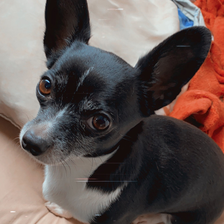

In [2]:
from PIL import Image

image2 = Image.open("luke1.jpg")
image = Image.open("luke1.jpg")
image.resize((224, 224), Image.LANCZOS)

### Schritt 2: Daten vorbereiten

- Skalieren auf 224x224 Pixel
- Ggf. sicherstellen, dass wir 3 Farbkanäle haben
- In ein Numpy-Array umwandeln
- Die `preprocess_input`-Funktion aus dem `keras.applications.vgg16`-Paket verwenden

In [3]:
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input

image = image.resize((224, 224), Image.LANCZOS)
image = np.asarray(image).reshape(1, 224, 224, 3)
image = preprocess_input(image)

In [4]:
image.shape # (1, 224, 224, 3)

(1, 224, 224, 3)

### Schritt 3: VGG16 laden, und `X_after_vgg` berechnen

In [5]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg16_model = VGG16(include_top=False, input_shape=(224, 224, 3))
X_after_vgg = vgg16_model.predict(image)

In [6]:
X_after_vgg.shape

(1, 7, 7, 512)

### Schritt 4: Unser Modell laden und die Wahrscheinlichkeit für eine Katze berechnen

In [7]:
from tensorflow.keras.models import load_model

model = load_model("transfer-learning.h5")
predict = model.predict(X_after_vgg)
if predict[0] == 0. :
    print("It´s a Dog")
if predict[0] == 1. :
    print("It´s a Cat")

It´s a Dog


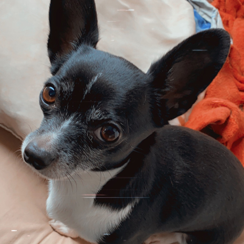

In [9]:
image2.resize((244,244))